In [1]:
backend = 'onnxruntime'
# backend = 'sklearn'
# backend = 'sql_duckdb'
# backend = 'lleaves'
# backend = 'treelite'

model = 'bank-marketing_d5_l32_n63_20241104160411'

if backend == 'onnxruntime':
    result_file = 'result.csv'
else:
    result_file = f'result_{backend}.csv'

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
822,bank-marketing_d5_l32_n63_20241104160411,0,0.0,bank-marketing,1G,1,2.677620
823,bank-marketing_d5_l32_n63_20241104160411,1,0.0,bank-marketing,1G,1,1.343708
824,bank-marketing_d5_l32_n63_20241104160411,2,0.0,bank-marketing,1G,1,1.346757
825,bank-marketing_d5_l32_n63_20241104160411,1,1.0,bank-marketing,1G,1,1.343990
826,bank-marketing_d5_l32_n63_20241104160411,2,1.0,bank-marketing,1G,1,1.349797


In [3]:
data = df[df['pruned'] == 0]['data'].values[0]
threads = df[df['pruned'] == 0]['threads'].values[0]
scale = df[df['pruned'] == 0]['scale'].values[0]


base_line = df[df['pruned'] == 0]['time'].values[0]
x = df[df['pruned'] == 1]['predicate'].values
y1 = df[df['pruned'] == 1]['time'].values
y2 = df[df['pruned'] == 2]['time'].values

(0.0, 2.7443155490929105)

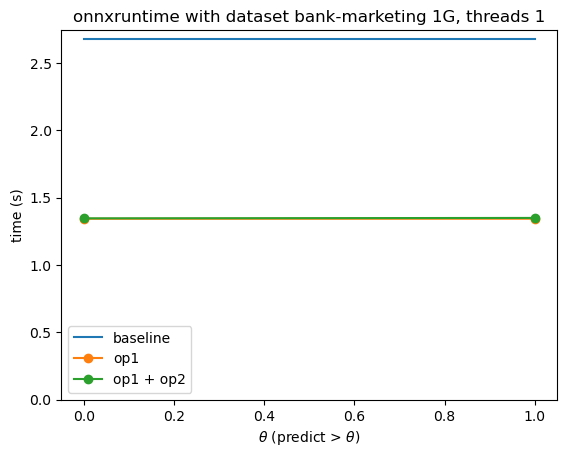

In [4]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))], label='baseline')
plt.plot(x, y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, y2, marker='o', label='op1 + op2')
plt.title(f'{backend} with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.legend()
plt.ylim(0)

(0.0, 2.0423448715501586)

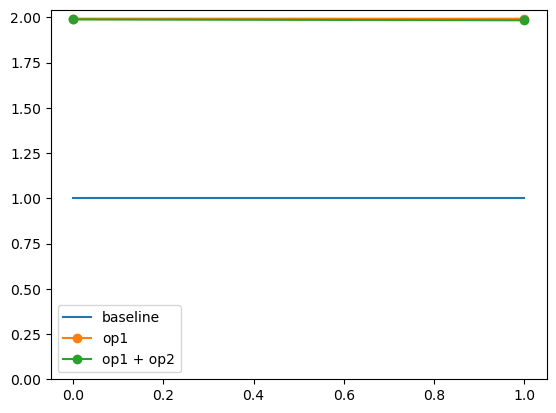

In [5]:
plt.plot(x, [1 for _ in range(len(x))], label='baseline')
plt.plot(x, base_line / y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, base_line / y2, marker='o', label='op1 + op2')
plt.legend()
plt.ylim(0)